## Watershed Algorithm

Metaphorically, the watershed algorithm transformation treats the image its operates upon like a topographic map, with the brightness of each point representing its height, and finds the lines that run along the tops of ridges.

Any grayscale image can be viewed as a topographic surface where high intensity denotes the peak and hills while low intensity denotes the valleys.

The algorithm can then fill every isolated valleys(local minima) with different colored water(labels).

As the "water"(intensity) rises depending on the peaks(gradients) nearby, "water" from different valleys(different segments of the image), with different colors could start to merge.

To avoid this merging, the algorithml creates barriers(segment edge boundaries) in locations where water merges.

This algorithm is especially useful for segmenting images into background and foreground in situations that are difficult for other algorithms.

In [1]:
#import all the required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def display(image,cmap=None):
    fig=plt.figure(figsize=(10,12))
    ax=fig.add_subplot(111)
    ax.imshow(image,cmap)


## Task Draw Contours around the coin

In [6]:
# Load the image
img=cv2.imread('pennies.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

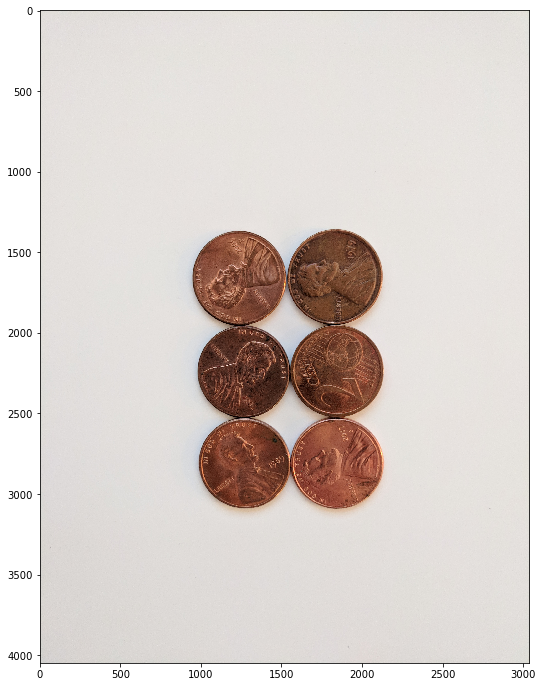

In [4]:
display(img)

### Naive Approach
Apply threshold and findContours

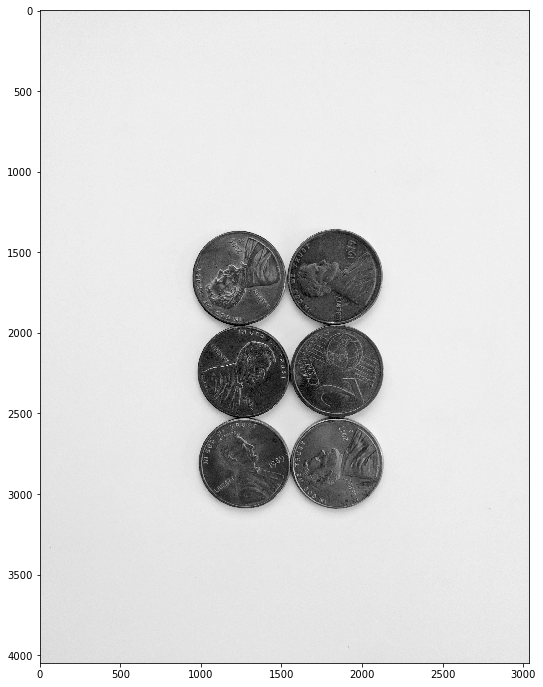

In [7]:
display(gray_img,cmap='gray')

In [18]:
# Apply media blur to the image
blur_img=cv2.medianBlur(gray_img,25)

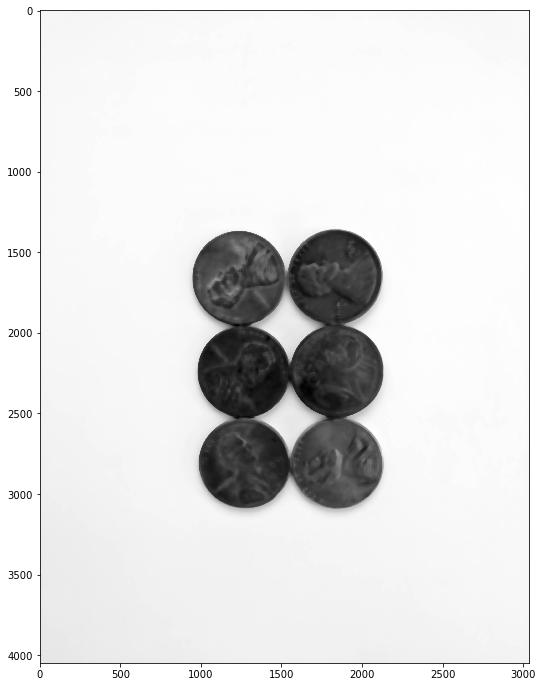

In [19]:
display(blur_img,cmap='gray')

In [23]:
# Apply binary threshold
ret,thres1=cv2.threshold(blur_img,160,255,cv2.THRESH_BINARY_INV)

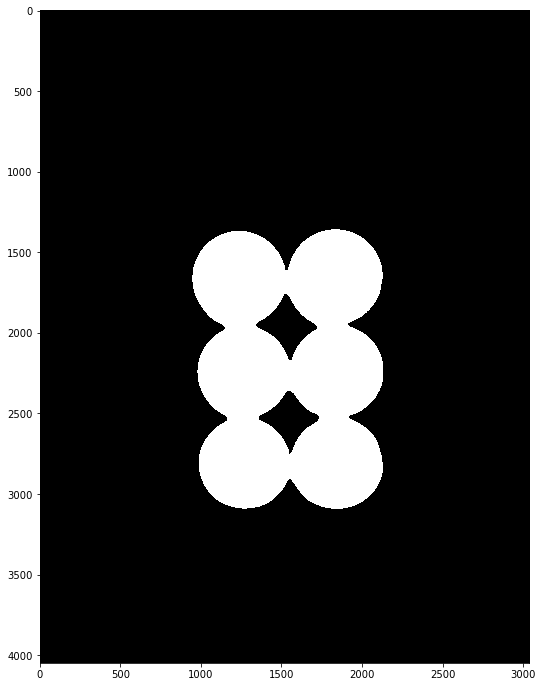

In [24]:
display(thres1,cmap='gray')

In [25]:
# Find contours
image,contours,hierarchy=cv2.findContours(thres1,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [38]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(img,contours,i,(0,255,0),10)

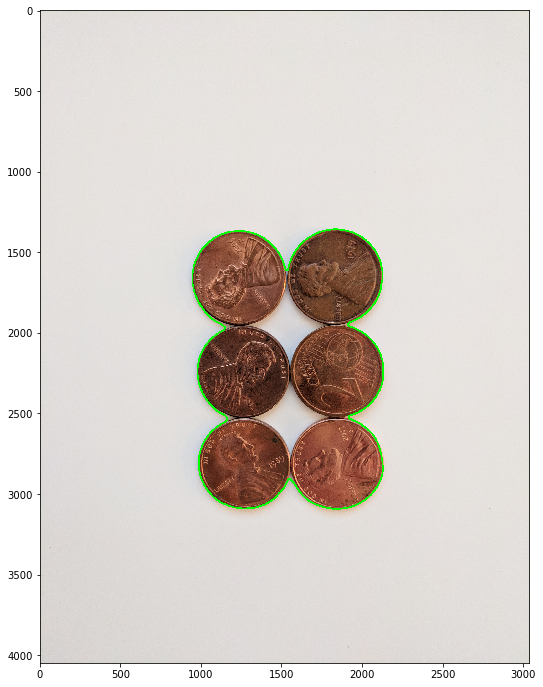

In [39]:
display(img)

In [40]:
# As we can observe our naive method suggest that these coins are a single object not seperate.

## Watershed Algorithm

In [41]:
# Let's try finding external contours with the help of watershed algorithm

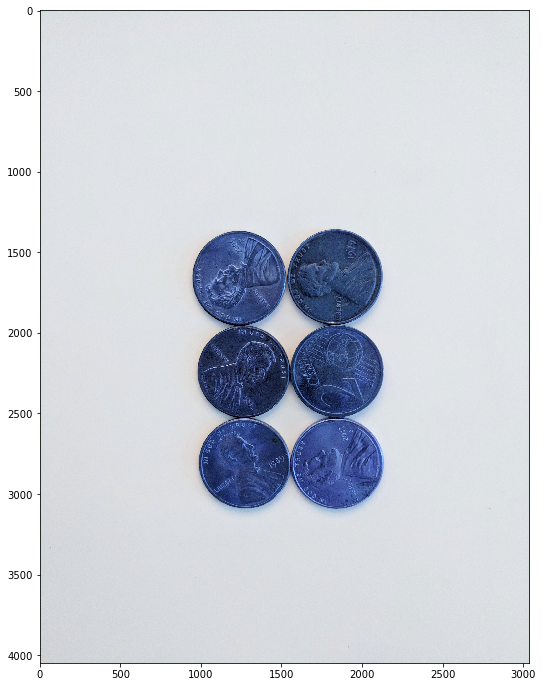

In [42]:
coins_img=cv2.imread('pennies.jpg')
display(coins_img)

**Step1. Blur Image**

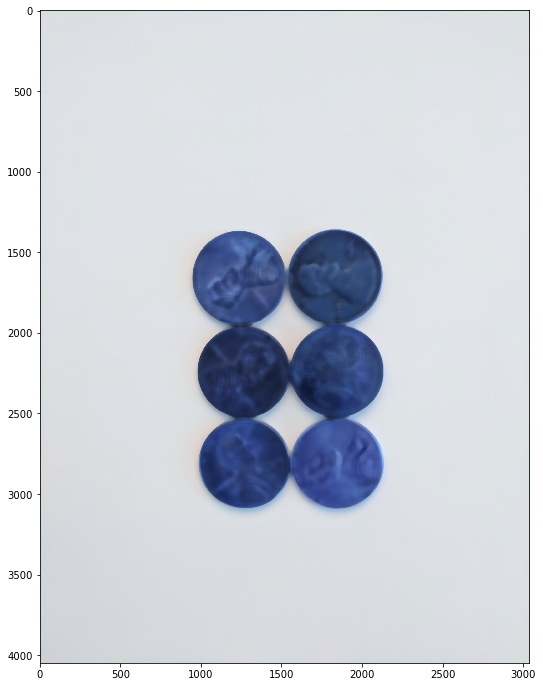

In [45]:
blur_coin_img=cv2.medianBlur(coins_img,35)
display(blur_coin_img)

**Step2.Convert the image to grayscale**

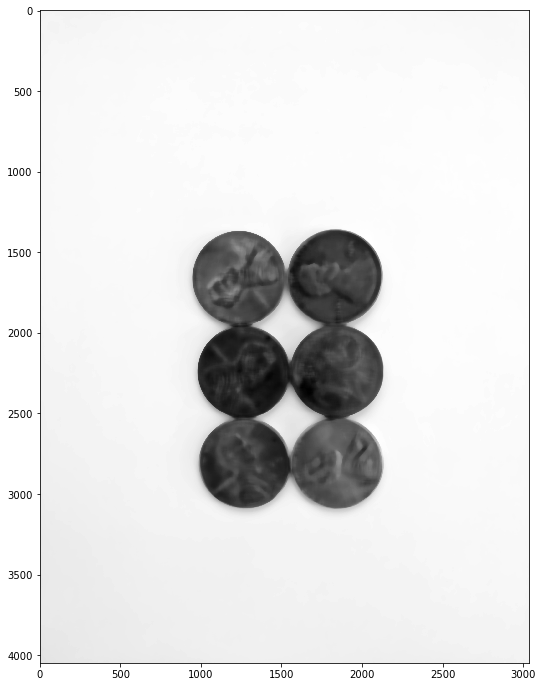

In [46]:
gray_coin_img=cv2.cvtColor(blur_coin_img,cv2.COLOR_BGR2GRAY)
display(gray_coin_img,cmap='gray')

**Step 3. Apply Threshold (Inverse Binary + OTSU)**

In computer Vision and image processing, otsu's method, named after Nobuyuki Otsu, is used to perform automatic image thresholding. In the simplest form, the algorithm returns a single intensity threshold that seperate pixels between classes, foreground and background.

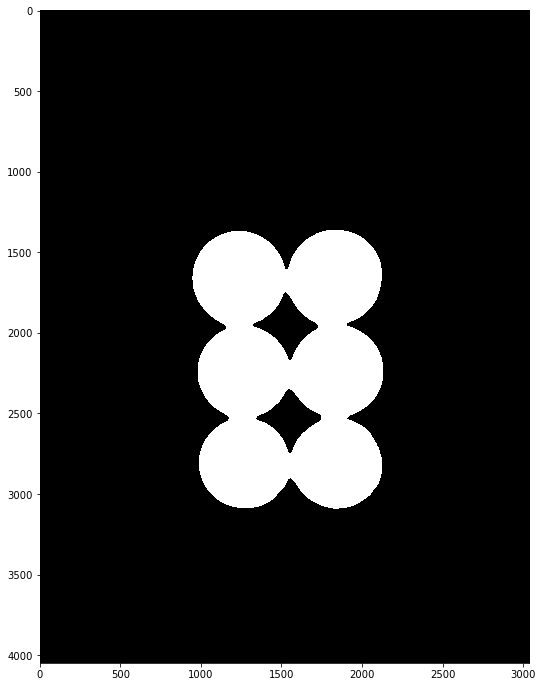

In [47]:
ret, thresh=cv2.threshold(gray_coin_img,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(thresh,cmap='gray')

**Step 4. Noise Removal**

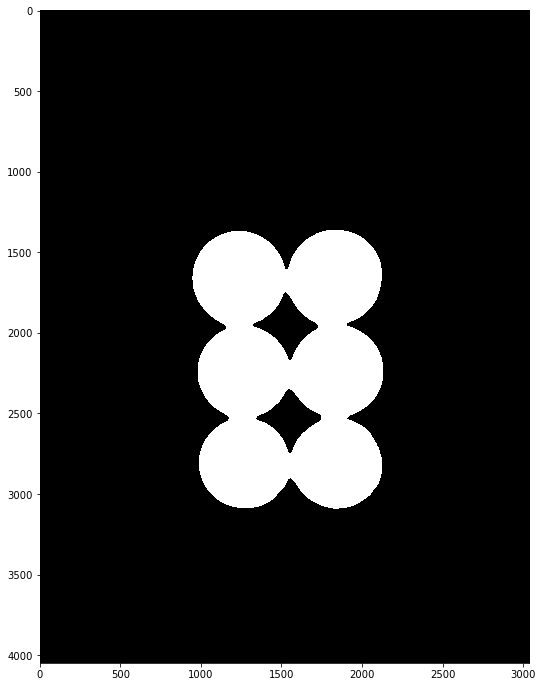

In [49]:
kernel=np.ones((5,5),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening,cmap='gray')

**Step 5. Grab the background that you are sure of:**

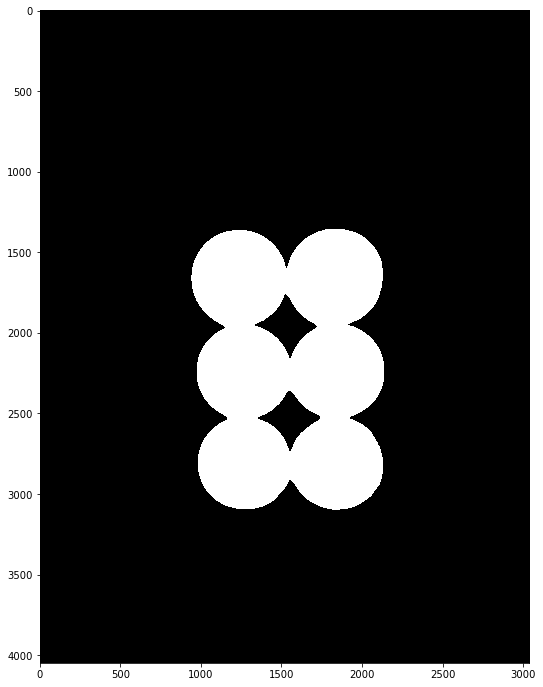

In [51]:
# Sure background area
sure_bg=cv2.dilate(opening,kernel,iterations=3)
display(sure_bg,cmap='gray')

**Step 6. Find the sure foreground**

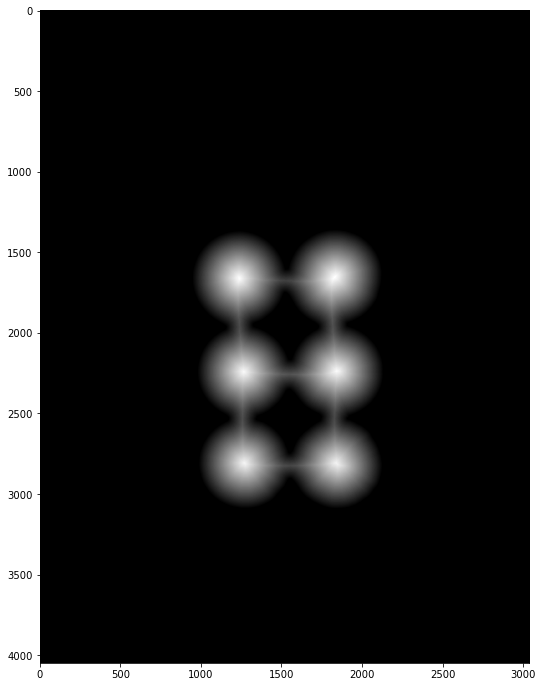

In [57]:
dit_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg=cv2.threshold(dit_transform,0.7*dit_transform.max(),255,0)
display(dit_transform,cmap='gray')

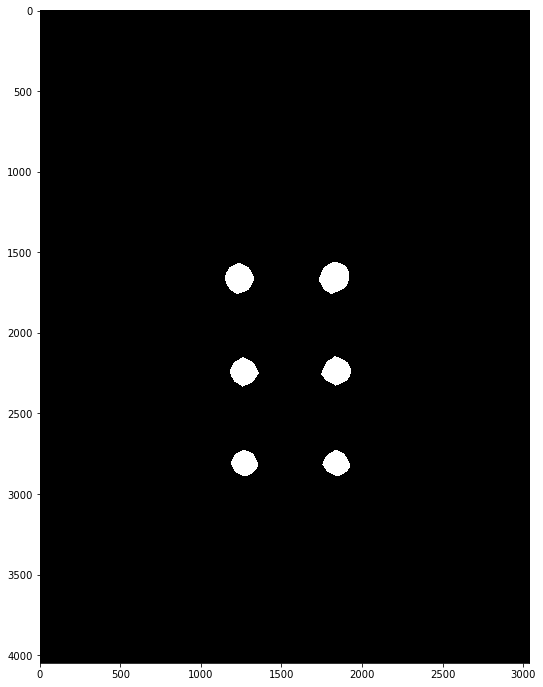

In [58]:
display(sure_fg,cmap='gray')

**Step 7. Find the Unknown region**

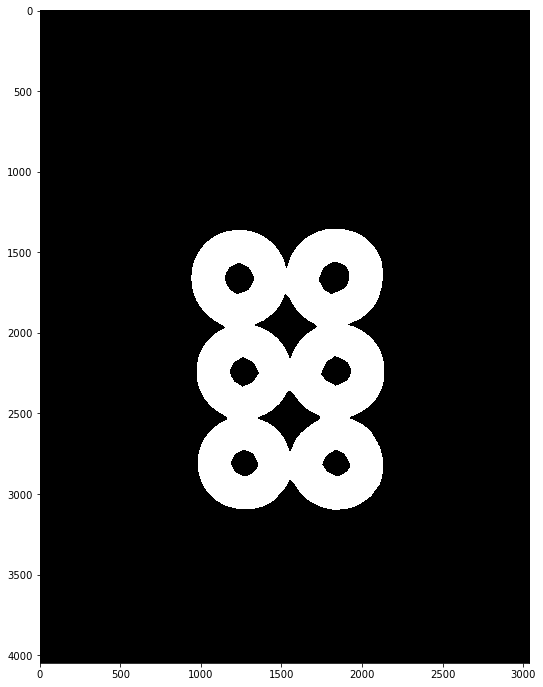

In [59]:
sure_fg=np.uint8(sure_fg)
unknown_fg=cv2.subtract(sure_bg,sure_fg)
display(unknown_fg,cmap='gray')

**Step 8. Label Markers of Sure Foreground**

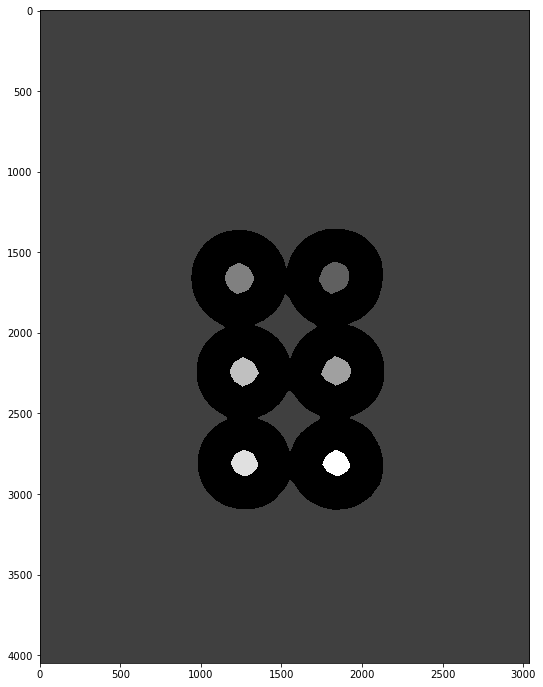

In [62]:
# Marker labelling
ret, markers=cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers=markers+2

# Now mark the region of unknown with 0
markers[unknown_fg==255]=0

display(markers,cmap='gray')

**Step 9. Apply watershed Algorithm to find Markers**

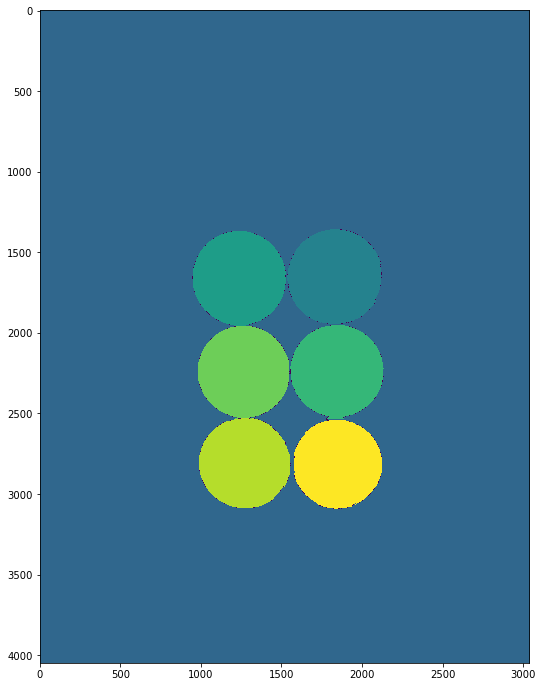

In [100]:
markers=cv2.watershed(coins_img,markers)
display(markers)

**Step 10. Find the Contours on the Markers**

In [101]:
image,contours,hierarchy=cv2.findContours(markers,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

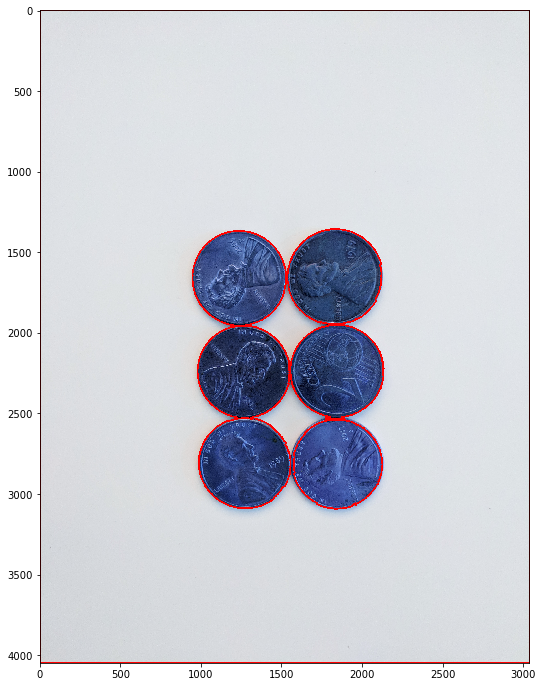

In [105]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(coins_img,contours,i,(255,0,0),8)
display(coins_img)

In [106]:
# Now after applying watershed algorithm we can able to draw external contour on each coin